<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/analytics-descriptive-and-predictive/Aula%2003%20-%20Aplica%C3%A7%C3%B5es%20de%20M%C3%A9todos%20N%C3%A3o-Supervisionados.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

 ## KNN - Vizinhos mais próximos

In [1]:
#vamos criar algumas funções para exibir as imagens

import matplotlib.pyplot as plt
from PIL import Image
    
def show_big_image(i): # exibe imagem a partir da array de dados
    i = np.resize((i/16 * 255),(8,8)) #faz o resize para facilitar a exibição
    plt.gray()
    plt.matshow(i)
    plt.show()

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits() #carrega a base de digitos do mnist

ss = StandardScaler(with_std=False) #realiza a normalização
X = ss.fit_transform(digits['data']) #a partir dos dados na coluna 'data'

In [3]:
from sklearn.neighbors import NearestNeighbors

#calcula o KNN para k = 25
knn = NearestNeighbors(algorithm='ball_tree', n_neighbors=25, leaf_size=30)
knn.fit(X)

NearestNeighbors(algorithm='ball_tree', n_neighbors=25)

In [4]:
import numpy as np

X_noise = X[50] + np.random.normal(0.0, 1.5, size=(64, )) # cria uma amostra chamada X_noise que representa a amostra original qualquer + ruído gerado aleatóriamente

<Figure size 640x480 with 0 Axes>

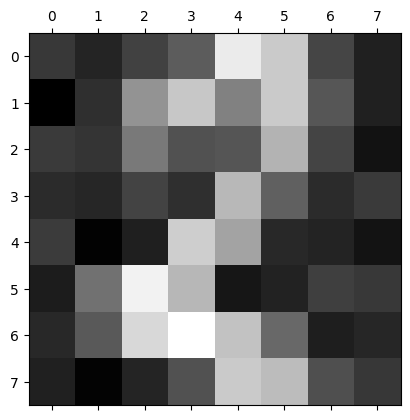

In [5]:
#show_big_image( ss.inverse_transform([X[520]])[0])
show_big_image( ss.inverse_transform([X_noise])[0]) #exibe a imagem em X_noise

In [6]:
#apresenta quais sao os vizinhos mais próximos ao exemplo selecionado em X_noise
distances, neighbors = knn.kneighbors(X_noise.reshape(1, -1), return_distance=True)

print(distances[0])

[11.45665203 20.38745627 24.18545506 26.8407036  27.27074    29.32289433
 29.85935591 30.02390391 30.72881413 31.21421638 31.71575672 32.80035464
 32.9196472  33.73229671 33.82088242 34.31679222 34.44376288 34.51300775
 34.7007479  34.85882326 34.90297978 35.0406176  35.0837726  35.24532816
 35.33421706]


<Figure size 640x480 with 0 Axes>

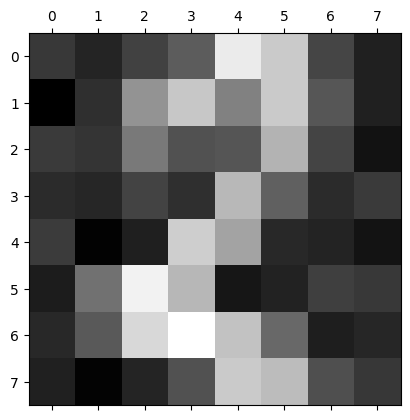

--------------------------
Distância: 11.456652026071842


<Figure size 640x480 with 0 Axes>

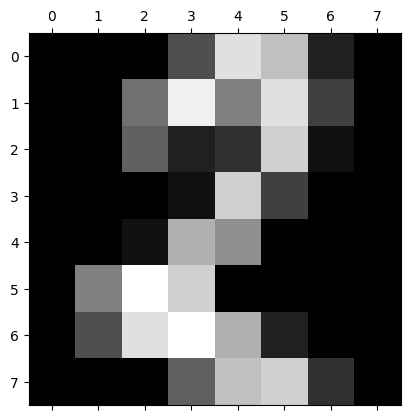

--------------------------
Distância: 20.38745627003488


<Figure size 640x480 with 0 Axes>

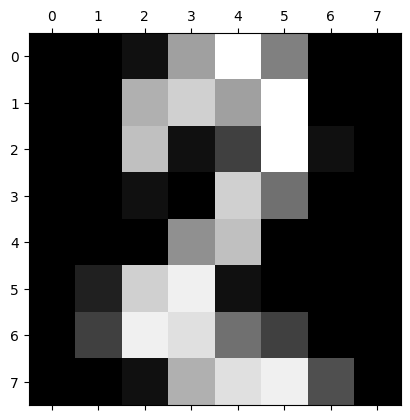

--------------------------
Distância: 24.185455056551824


<Figure size 640x480 with 0 Axes>

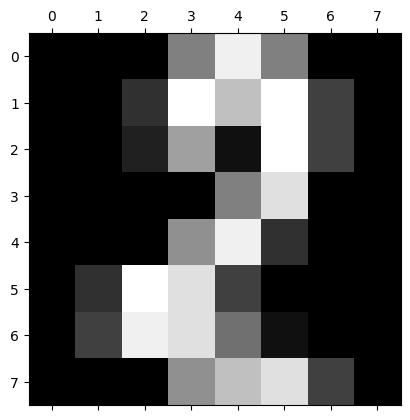

--------------------------
Distância: 26.840703597184802


<Figure size 640x480 with 0 Axes>

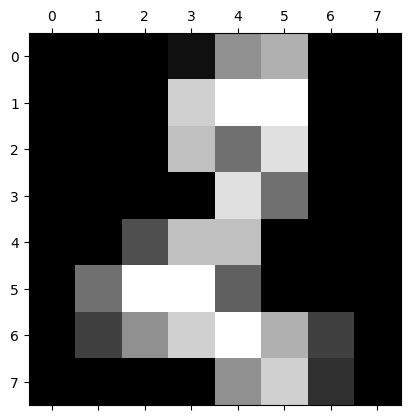

--------------------------
Distância: 27.27074000126019


<Figure size 640x480 with 0 Axes>

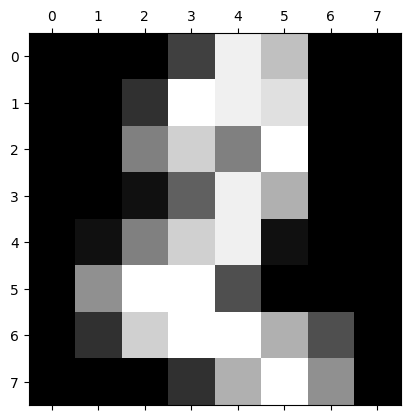

--------------------------
Distância: 29.322894333752036


<Figure size 640x480 with 0 Axes>

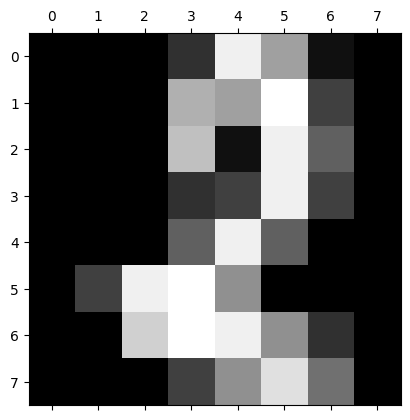

--------------------------
Distância: 29.859355909679962


<Figure size 640x480 with 0 Axes>

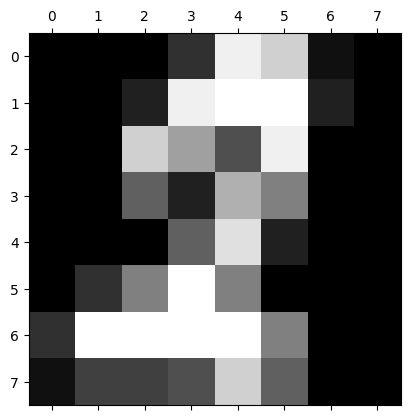

--------------------------
Distância: 30.023903907341815


<Figure size 640x480 with 0 Axes>

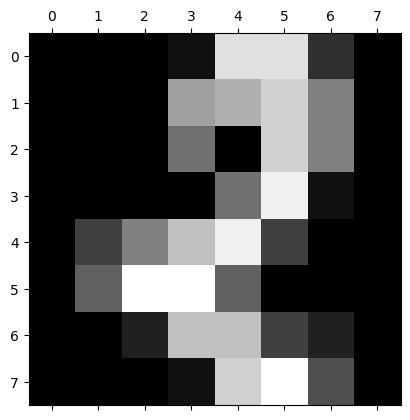

--------------------------
Distância: 30.728814133460443


<Figure size 640x480 with 0 Axes>

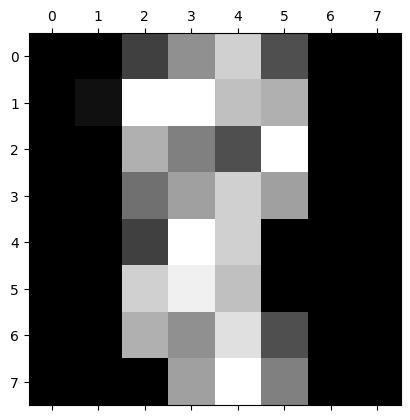

--------------------------
Distância: 31.21421638320025


<Figure size 640x480 with 0 Axes>

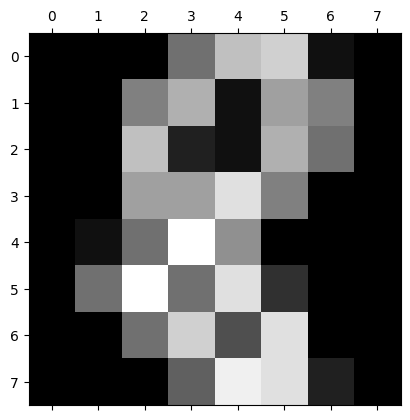

--------------------------
Distância: 31.715756718327444


<Figure size 640x480 with 0 Axes>

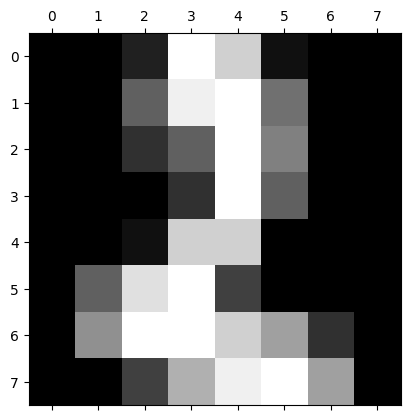

--------------------------
Distância: 32.80035464399762


<Figure size 640x480 with 0 Axes>

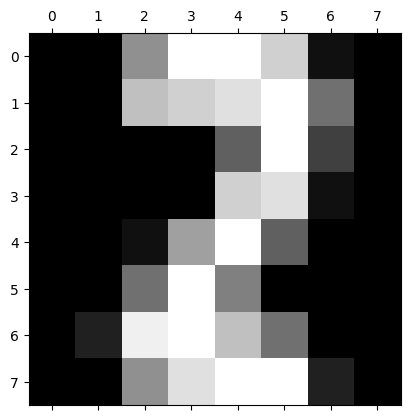

--------------------------
Distância: 32.91964719871881


<Figure size 640x480 with 0 Axes>

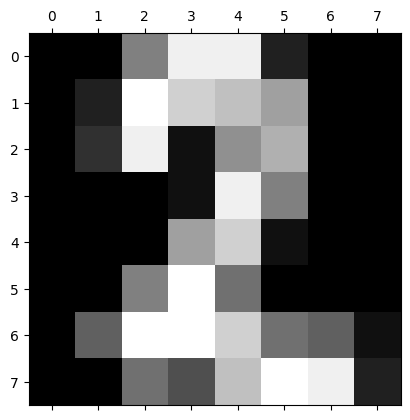

--------------------------
Distância: 33.732296713334


<Figure size 640x480 with 0 Axes>

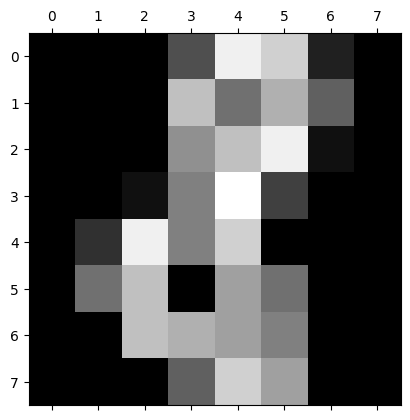

--------------------------
Distância: 33.820882422312


<Figure size 640x480 with 0 Axes>

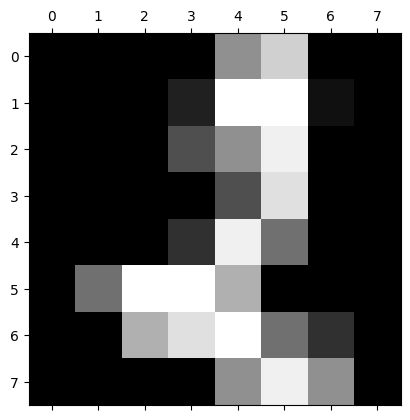

--------------------------
Distância: 34.31679221602166


<Figure size 640x480 with 0 Axes>

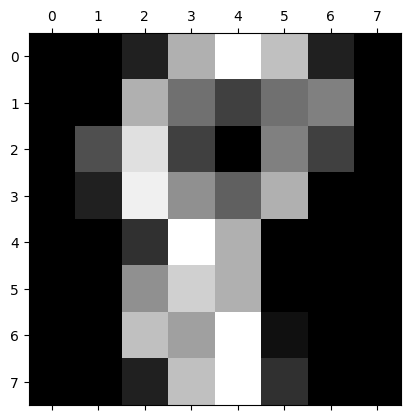

--------------------------
Distância: 34.44376287777508


<Figure size 640x480 with 0 Axes>

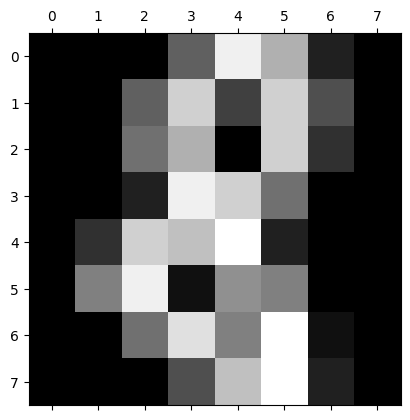

--------------------------
Distância: 34.51300775489919


<Figure size 640x480 with 0 Axes>

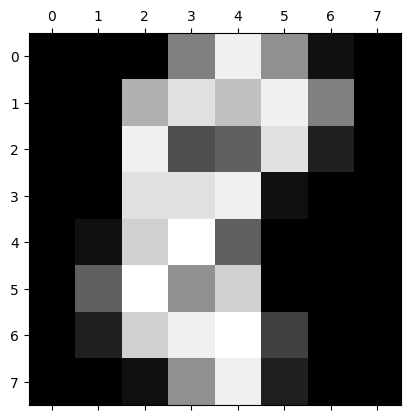

--------------------------
Distância: 34.700747904208896


<Figure size 640x480 with 0 Axes>

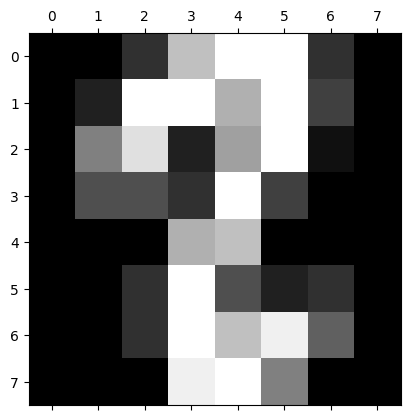

--------------------------
Distância: 34.858823257605316


<Figure size 640x480 with 0 Axes>

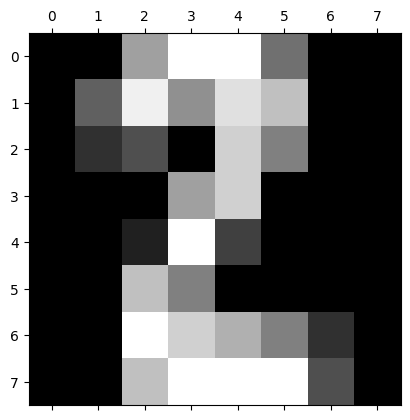

--------------------------
Distância: 34.90297977650625


<Figure size 640x480 with 0 Axes>

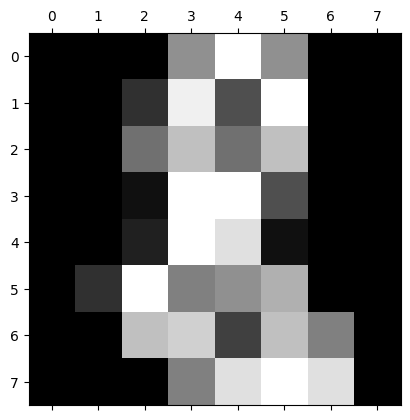

--------------------------
Distância: 35.04061760478931


<Figure size 640x480 with 0 Axes>

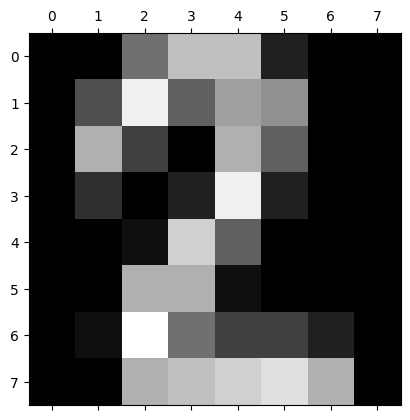

--------------------------
Distância: 35.08377260469082


<Figure size 640x480 with 0 Axes>

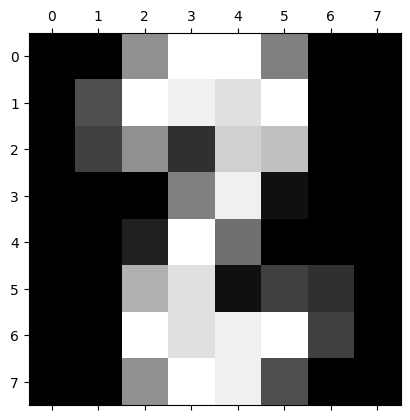

--------------------------
Distância: 35.24532815977757


<Figure size 640x480 with 0 Axes>

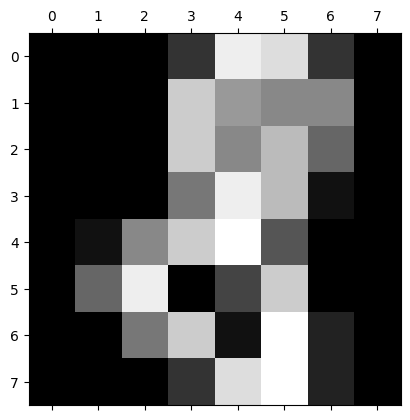

--------------------------
Distância: 35.33421705741768


<Figure size 640x480 with 0 Axes>

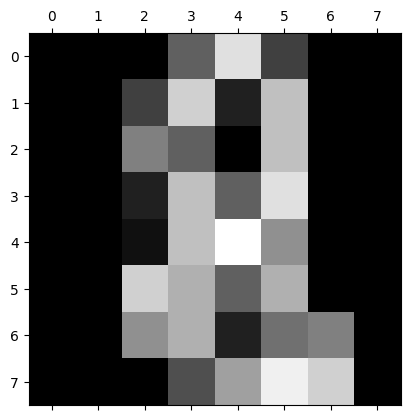

In [7]:
noise_img = ss.inverse_transform([X_noise])[0]
show_big_image(noise_img) #exibe a imagem X_Noise

#dig_img = ss.inverse_transform([[X[neighbors[0][0]]][0]])[0]
#show_big_image(dig_img)

for i in range(len(neighbors[0])): #exibe os K vizinhos mais próximos
    dig_img = ss.inverse_transform([[X[neighbors[0][i]]][0]])[0]
    print("--------------------------")
    print("Distância:", distances[0][i]) #exibe a distância
    show_big_image(dig_img) # e a imagem

In [8]:
neighbors[0] #quem são os k vizinhos mais próximos ao X_noise

#perceba que o primeiro vizinho é o 50 - exatamente a amostra que usamos como referência para criar o X_noise

array([  50,  116,  115,   57,    2,   51,  502,   54,  114,  630,  113,
        860, 1041,  524,   75,  284,  554,  760,  700,  340,  556,  369,
        761,  638,  569])

## K-means

In [9]:
from sklearn.datasets import make_blobs

#vamos criar uma base aleatória com 1000 pontos
nb_samples = 1000

# a base terá duas colunas (features) e 3 centros (p/ definir as clases/clusters) - será espalhado com dev pad 2.5 
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=2.5, random_state=1000)

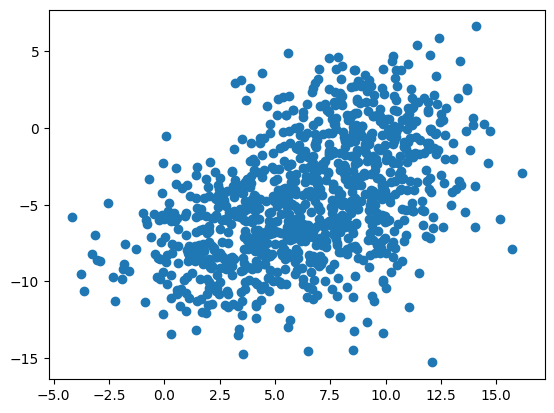

In [10]:

#exibe os dados do dataset X que acabamos de criar p/ este exemplo
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [11]:
from sklearn.cluster import KMeans

#vamos usar o K-Means++ para encontrar 2 clusters
km = KMeans(n_clusters=2,init='k-means++')
km.fit(X) #executa o algoritmo

#exibe os centroides para os dois grupos
print(km.cluster_centers_)

[[ 4.25506377 -7.44435313]
 [ 9.11020722 -1.34522143]]


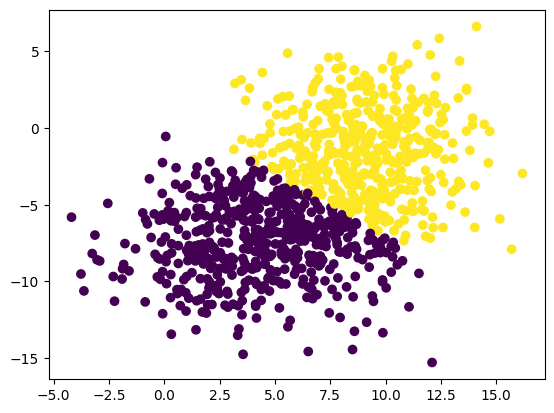

In [12]:
#exibe os grupos que foram definidos 
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X)) #km.predict retorna o grupo de cada ponto X
plt.show()

In [13]:
from sklearn.datasets import make_circles

#vamos criar outro dataset com 1000 pontos
nb_samples = 1000

#usando o formato "circles" com ruído de 0.05
X, Y = make_circles(n_samples=nb_samples, noise=0.05)

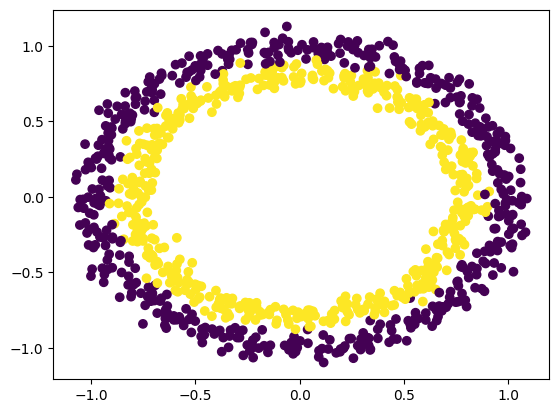

In [14]:
#exibimos o dataset criado
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=Y)
plt.show()

In [15]:
#vamos calcular 2 clusters para o novo dataset
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

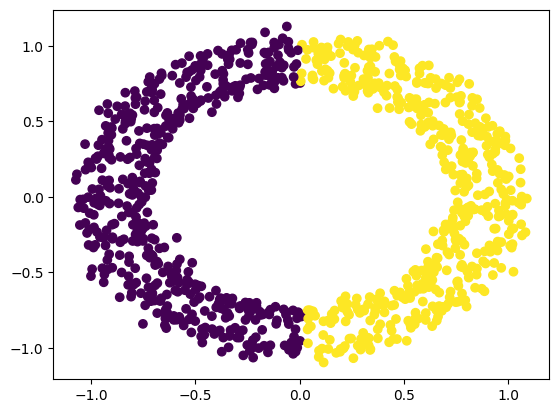

In [16]:
# e verificar o resultado
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1],c=km.predict(X))
plt.show()

### Silhouette score

In [17]:
#vamos calcular qual seria o melhor número de clusters
#para o dataset proposto? Para isto usando o algoritmo silhouette

from sklearn.metrics import silhouette_score

#criamos um conjunto de hipóteses
nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

#e um para receber o resultado de cada silhouette
avg_silhouettes = []

for n in nb_clusters: #para cada parâmetro k do kmeans (aqui n = número de clusters)
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X) #calcula os clusters
    avg_silhouettes.append(silhouette_score(X, Y)) # o silhouette dos clusters definidos

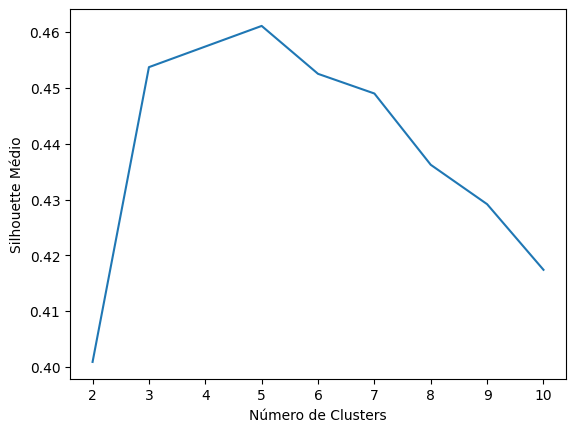

In [18]:
# em seguida, podemos plotar o score de cada parâmetro
# e verificar qual a melhor quantidade de clusters para o dataset
plt_aics = plt.figure()
plt.plot(nb_clusters,avg_silhouettes)
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Médio")
plt.show()

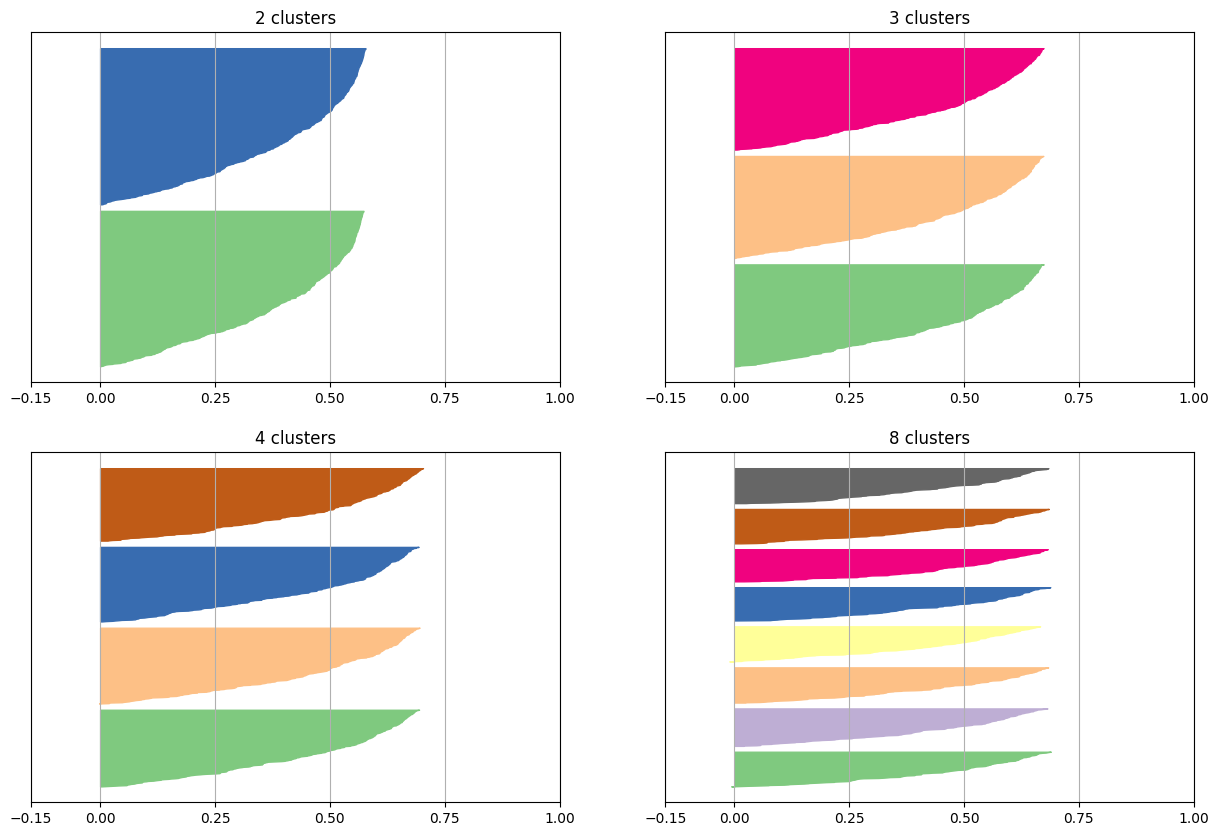

In [19]:
#também podemos definir o perfil de cada cluster
#ou melhor, a silhouette p/ cada parâmetro

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples #neste exemplo, vamos usar a dataset de exemplo para o problema

fig, ax = plt.subplots(2, 2, figsize=(15, 10)) #criamos um conjunto de gráficos (subplots)

nb_clusters = [2, 3, 4, 8] # e definimos os parâmetros k para 2, 3, 4 e 8
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)] #define a posição de cada gráfico

for i, n in enumerate(nb_clusters): # para cada parâmetro em nb_clusters
    km = KMeans(n_clusters=n) #calculamos o kmeans p/ k = n
    Y = km.fit_predict(X)

    silhouette_values = silhouette_samples(X, Y) # colorimos os clusters em função da predição
    
    # e plotamos o gráfico
    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    ax[mapping[i]].grid()
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()
        
        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                     ct_values, facecolor=color, edgecolor=color)
        y_lower = y_upper + 20

## Hierarchical Clustering

In [20]:
from sklearn.datasets import make_blobs

# vamos criar um dataset com 25 amostras
nb_samples = 25

#do tipo blob (pontos), com definição de 2 atributos, 3 centros bem definidos com desv.pad de 1.5
X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5)

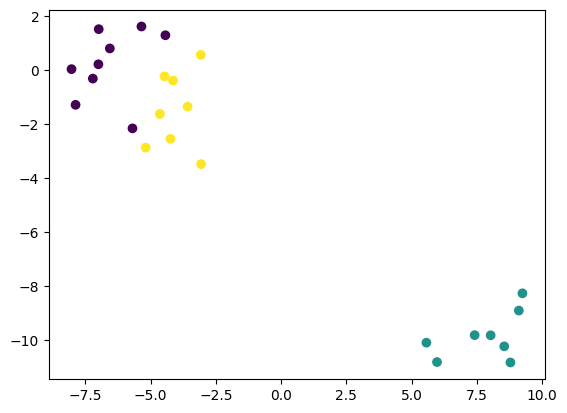

In [21]:
#vamos checar agora como ficou o dataset

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

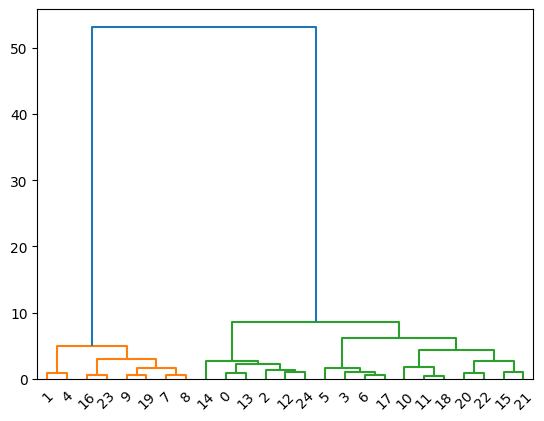

In [22]:
#p/ o HCA, vamos testar o método ward
#que exibira os resultados do cluster hierárquico no dendograma

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Xdist = pdist(X, metric='euclidean') #usamos distância entre os pontos euclideana
Xl = linkage(Xdist, method='ward') #método ward
Xd = dendrogram(Xl) # dendograma

In [23]:
from sklearn.datasets import make_blobs

#vamos criar outro exemplo com 3000 pontos
nb_samples = 3000

#composto de pontos, com 2 atributos (X,Y), 8 centros e desv.pad = 2.0
X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=8, cluster_std=2.0)

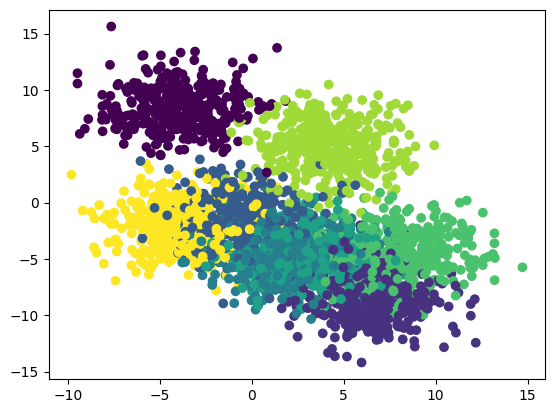

In [24]:
#vamos plotar um gráfico para ver como ficou...

import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [25]:
# p/ o HCA, vamos usar o método aglomerativo
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

ac = AgglomerativeClustering(n_clusters=8, linkage='complete') #método aglomerativo p/ 8 clusters usando método completo
Y_pred = ac.fit_predict(X)

#vamos ver a qualidade do cluster? para isto, verificamos o silhouette
print('Silhouette score (Complete): %.3f' % silhouette_score(X, Y_pred))
print('Adjusted Rand score (Complete): %.3f' % adjusted_rand_score(Y, Y_pred))

Silhouette score (Complete): 0.287
Adjusted Rand score (Complete): 0.390


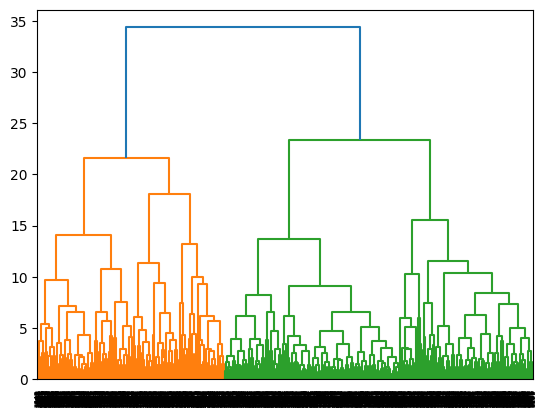

In [26]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#para o cluster vamos plotar o dendograma usando método completo
Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='complete')
Xd = dendrogram(Xl)

In [27]:
ac = AgglomerativeClustering(n_clusters=8, linkage='average') #método aglomerativo p/ 8 clusters usando método médio
Y_pred = ac.fit_predict(X)

#vamos ver a qualidade do cluster? para isto, verificamos o silhouette
print('Silhouette score (Average): %.3f' % silhouette_score(X, Y_pred))
print('Adjusted Rand score (Average): %.3f' % adjusted_rand_score(Y, Y_pred))

Silhouette score (Average): 0.327
Adjusted Rand score (Average): 0.416


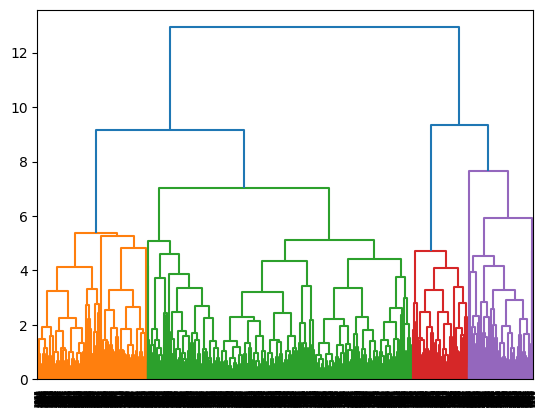

In [28]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#para o cluster vamos plotar o dendograma usando método médio
Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='average')
Xd = dendrogram(Xl)

In [29]:
ac = AgglomerativeClustering(n_clusters=8) #método aglomerativo p/ 8 clusters método ward
Y_pred = ac.fit_predict(X)

#vamos ver a qualidade do cluster? para isto, verificamos o silhouette
print('Silhouette score (Ward): %.3f' % silhouette_score(X, Y_pred))
print('Adjusted Rand score (Ward): %.3f' % adjusted_rand_score(Y, Y_pred))

Silhouette score (Ward): 0.354
Adjusted Rand score (Ward): 0.483


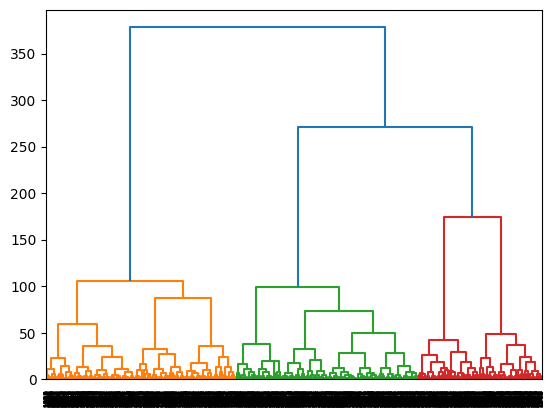

In [30]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#para o cluster vamos plotar o dendograma usando método ward
Xdist = pdist(X, metric='euclidean')
Xl = linkage(Xdist, method='ward')
Xd = dendrogram(Xl)

## DBSCAN

In [31]:
from sklearn.datasets import make_moons

#vamos criar um dataset com 1000 amostras
nb_samples = 1000

#no formato moon, com noise de 0.05
moon_X, moon_Y = make_moons(n_samples=nb_samples, noise=0.05)

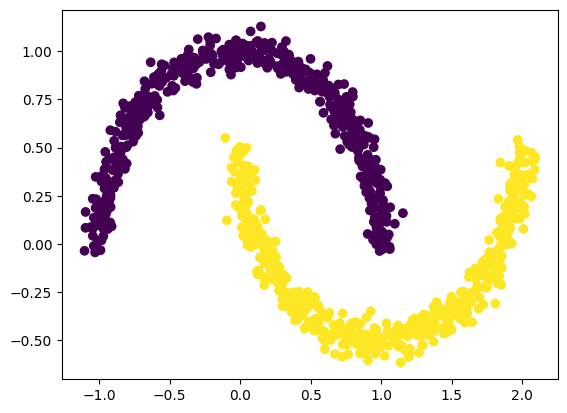

In [32]:
#vamos plotar para ver como ficou
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(moon_X[:, 0], moon_X[:, 1], c=moon_Y)
plt.show()

In [33]:
from sklearn.cluster import DBSCAN

#agora, vamos carregar o algoritmo DBScan com Eps = 0.1
dbs = DBSCAN(eps=0.1)
moon_Y_db = dbs.fit_predict(moon_X) # e verificar sua resposta

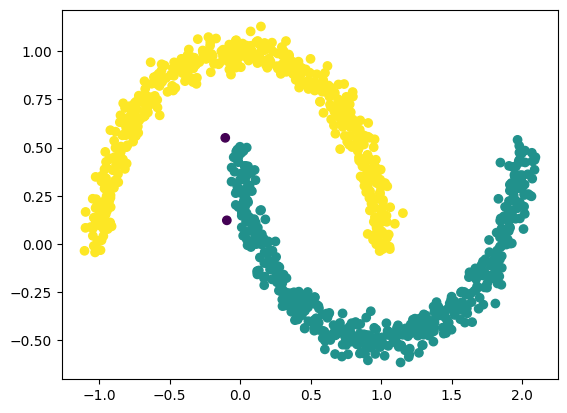

In [34]:
#vamos ver como ficou a separação de clusters?
#veja que próximo ao cluster de baixo (ciano) tem 2 anomalias
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(moon_X[:, 0], moon_X[:, 1],c=moon_Y_db)
plt.show()

In [35]:
from sklearn.cluster import DBSCAN

# vamos verificar o algoritmo DBScan com Eps = 0.05
dbs = DBSCAN(eps=0.05)
moon_Y_db = dbs.fit_predict(moon_X)

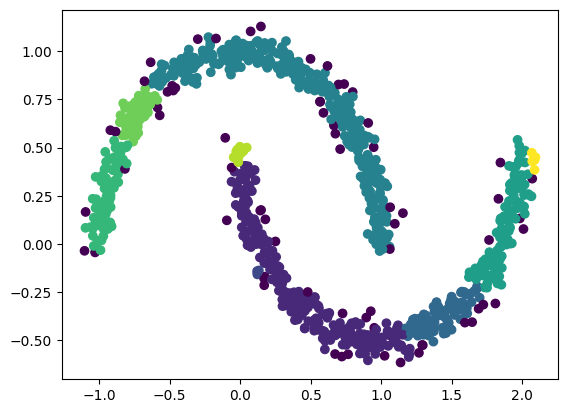

In [36]:
#vamos ver como ficou a separação de clusters?
#veja que o algoritmo foi mais rígido e calculou mais anomalias
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(moon_X[:, 0], moon_X[:, 1],c=moon_Y_db)
plt.show()